# Character Spaces

This notebook explores ideas about character spaces in relationship to TED talk speakers with an eye to possible differences in such spaces between male and female speakers. We understand that gender as experienced is far more nuanced and rich than the m/f binary, and so this work should be considered simply a preliminary exploration of oral performances by individuals with an eye to a variety of ways that gender and domain might inflect how they project themselves into the world when using words. 

*This exploration will be made more interesting with the work on topics completed.*

In [1]:
import nltk, re, pandas as pd

In [6]:
import matplotlib as mpl, numpy as np
%pylab inline
figsize(12, 6)

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv('talks_female.csv')
texts = df.text.tolist()

# Quick Check & a Count
len(texts)

260

In [40]:
# Comparison of word counts
print(len([word.lower() for word in nltk.word_tokenize(texts[0])]))
print(len([word for word in re.sub("[^a-zA-Z']"," ", texts[0]).lower().split()]))

3570
3093


A quick check of the differences reveals that the NLTK `word_tokenize` function breaks apart contractions, which will be useful will discerning verbs (and possibly verb tenses) later in this notebook:

In [42]:
words0_nltk = [word.lower() for word in nltk.word_tokenize(texts[0])]
words0_re = [word for word in re.sub("[^a-zA-Z']"," ", texts[0]).lower().split()]
print(words0_nltk[0:10])
print(words0_re[0:10])

['if', 'you', "'re", 'here', 'today', '—', 'and', 'i', "'m", 'very']
['if', "you're", 'here', 'today', 'and', "i'm", 'very', 'happy', 'that', 'you']


In [45]:
# Now a quick check of word counts
counts = []
for text in texts:
    count = len([word for word in nltk.word_tokenize(text)])
    counts.append(count)
print(counts[0:10])

[3570, 3734, 4731, 1309, 841, 2992, 3728, 4316, 4413, 3403]


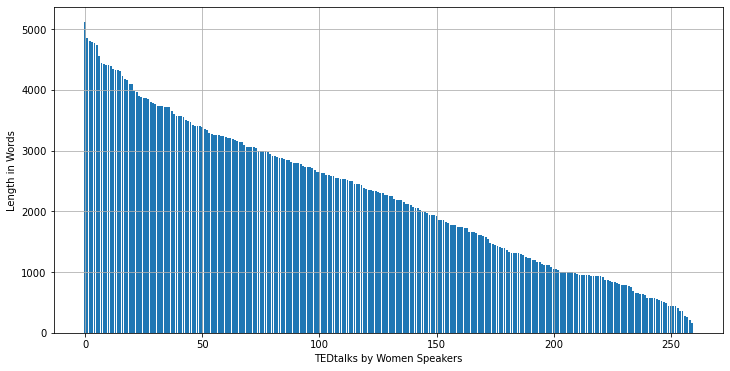

In [46]:
# View of Word Counts
length_sorted = sorted(counts, reverse=True)
plt.bar(range(len(length_sorted)), length_sorted)
plt.xlabel('TEDtalks by Women Speakers')
plt.ylabel('Length in Words')
plt.grid(True)
plt.show()

The next thing we are going to do is break all the talks into lists of sentences and run the NLTK PoS tagging library on them. 

Some pseudo code here to help me think through this:

```
break text into sentences
for sentences with I/me/my/mine:
    (break sentences into words)
    run PoS tagger
get list of verbs associated with I for actions performed by speaker
get list of verbs associated with me for actions performed on speaker
get list of nouns associated with my for entities belonging to speaker
```

This is a rough list meant to provide proof of concept/code.

In [47]:
# FXN to return sentences from a string

def sentience (the_string):
    sentences = [
        [word.lower() for word in nltk.word_tokenize(sentence)]
        for sentence in nltk.sent_tokenize(the_string)
    ]
    return sentences

In [51]:
test = sentience(texts[0])
type(test)

list

In [52]:
print(test[0:2])

[['if', 'you', "'re", 'here', 'today', '—', 'and', 'i', "'m", 'very', 'happy', 'that', 'you', 'are', '—', 'you', "'ve", 'all', 'heard', 'about', 'how', 'sustainable', 'development', 'will', 'save', 'us', 'from', 'ourselves', '.'], ['however', ',', 'when', 'we', "'re", 'not', 'at', 'ted', ',', 'we', 'are', 'often', 'told', 'that', 'a', 'real', 'sustainability', 'policy', 'agenda', 'is', 'just', 'not', 'feasible', ',', 'especially', 'in', 'large', 'urban', 'areas', 'like', 'new', 'york', 'city', '.']]


In [54]:
print(nltk.pos_tag(test))

AttributeError: 'list' object has no attribute 'isdigit'